In [ ]:
# Cas Donoghue


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the underlying python code, click <a href="javascript:code_toggle()">here</a>.''')

# Import modules
- Pandas is third party: Defines dataframe data structure
- os is in standard library

In [2]:
import pandas as pd
import os
import sqlite3 as lite

# Load Data
- Data is sqlite database

In [3]:
def execute_statement(query, database):
    ''' execute sql'''
    conn = lite.connect(database)
    result = pd.read_sql_query(query, conn)
    conn.close()
    return result

DATA_DIR = os.path.join(os.getcwd(), os.pardir, 'data')
iris_db_path = os.path.join(DATA_DIR, 'iris_db.sqlite')
iris_df = execute_statement("SELECT * FROM iris", iris_db_path)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Inspect Data

- pandas offers descriptive stats for numerical columns
- show describe method on full data set

In [4]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Calculate Stats by Species
- indexed by species and statistic for simple lookup

In [5]:
def describe_all(iris_df):
    ''' return descriptive stats dataframe by species and stat'''
    df_list = list()
    for species in iris_df['Species'].unique():
        species_subset = iris_df[iris_df['Species'] == species].describe()
        species_subset['Species'] = species
        df_list.append(species_subset)
        
    return pd.concat(df_list).reset_index().rename(columns={'index':'stat'}).set_index(['Species', 'stat'])


descriptive_stats = describe_all(iris_df)
descriptive_stats

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    stat                                                       
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean       5.006000     3.428000      1.462000     0.246000
           std        0.352490     0.379064      0.173664     0.105386
           min        4.300000     2.300000      1.000000     0.100000
           25%        4.800000     3.200000      1.400000     0.200000
           50%        5.000000     3.400000      1.500000     0.200000
           75%        5.200000     3.675000      1.575000     0.300000
           max        5.800000     4.400000      1.900000     0.600000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean       5.936000     2.770000      4.260000     1.326000
           std        0.516171     0.313798      0.469911     0.197753
           min        4.900000     2.000000      3.000000     1.000000
           25%        5.600000     2.525000      4.000000     1.200000
           50%        5.900000     2.800000      4.350000     1.300000
           75%        6.300000     3.000000      4.600000     1.500000
           max        7.000000     3.400000      5.100000     1.800000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean       6.588000     2.974000      5.552000     2.026000
           std        0.635880     0.322497      0.551895     0.274650
           min        4.900000     2.200000      4.500000     1.400000
           25%        6.225000     2.800000      5.100000     1.800000
           50%        6.500000     3.000000      5.550000     2.000000
           75%        6.900000     3.175000      5.875000     2.300000
           max        7.900000     3.800000      6.900000     2.500000

# indexing location
- demonstrate how multi index helps organize data

In [6]:
descriptive_stats.loc[('virginica','std'),'Petal.Width']

0.27465005563666739

In [7]:
descriptive_stats.loc[('virginica',['min', 'max']),:]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   stat                                                      
virginica min            4.9          2.2           4.5          1.4
          max            7.9          3.8           6.9          2.5

# Calculate area
- pretend surface are of petal, sepal can be approximated as rectangle area

In [8]:
iris_df['Sepal.Area'] = iris_df['Sepal.Length'] * iris_df['Sepal.Width']
iris_df['Petal.Area'] = iris_df['Petal.Length'] * iris_df['Petal.Width']
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area,Petal.Area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


# Calculate largest flower species by average area

In [9]:
mean_area = iris_df.loc[:,['Species', 'Sepal.Area', 'Petal.Area']].groupby('Species').mean()
mean_area.sort_values('Sepal.Area', ascending=False)

,Sepal.Area,Petal.Area
Species,,
virginica,19.6846,11.2962
setosa,17.2578,0.3656
versicolor,16.5262,5.7204


In [10]:
mean_area.sort_values('Sepal.Area', ascending=False)

,Sepal.Area,Petal.Area
Species,,
virginica,19.6846,11.2962
setosa,17.2578,0.3656
versicolor,16.5262,5.7204


# Visualization

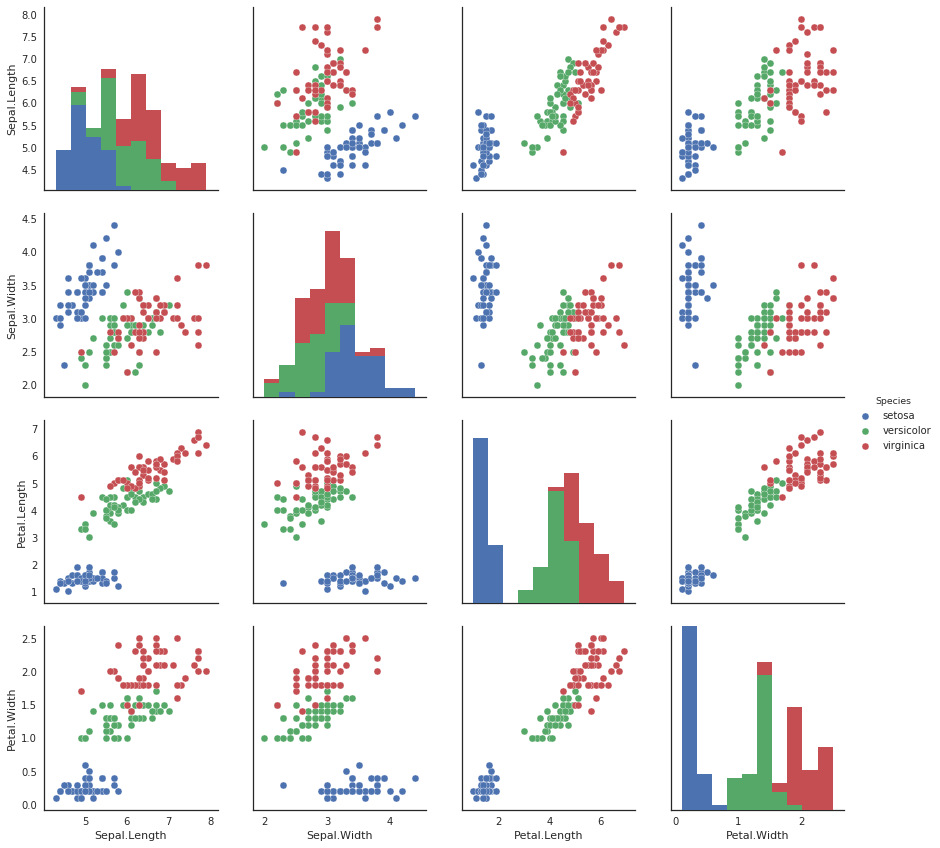

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    sns.set(style="white", color_codes=True)
    sns.pairplot(iris_df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']], hue='Species', size=3)
    plt.show()

In [12]:
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.models import HoverTool

output_file('example.html')

color_dict = dict(setosa='blue', virginica='red', versicolor='green')
melted_data = iris_df.melt(id_vars=['Species'])
melted_data['color'] = melted_data['Species'].map(lambda x: color_dict.get(x))
melted_data


source = ColumnDataSource(data=dict(
    species = melted_data['Species'],
    variable = melted_data['variable'],
    value = melted_data['value'],
    color = melted_data['color']
))

p = figure(x_range = ['Petal.Length','Petal.Width','Sepal.Length','Sepal.Width','Sepal.Area','Petal.Area'], title='Iris Identification',\
          plot_width=1200, plot_height=900)
p.circle('variable','value',fill_color='color',source=source,size=15,fill_alpha=0.5)
p.yaxis.axis_label = "centimeters"
p.background_fill_color = "black"
p.background_fill_alpha = 0.8
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = 'black'
hover = HoverTool(tooltips=[('Species', "@species"), ('Measurment', "@value")])
p.add_tools(hover)
show(p)